In [1]:
%cd C:\Users\yukir\Documents\GitHub\sign_detection\py

C:\Users\yukir\Documents\GitHub\sign_detection\py


In [2]:
from machine_learning import *
from basic_preprocessing import *

In [3]:
%cd C:\Users\yukir\Documents\Monicas_workspace\study

C:\Users\yukir\Documents\Monicas_workspace\study


### Data load

In [4]:
data_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\study\\Dataset\\multi_to SGD\\'

In [5]:
get_file_list(data_path)

['C:\\Users\\yukir\\Documents\\Monicas_workspace\\study\\Dataset\\multi_to SGD\\fragile',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\study\\Dataset\\multi_to SGD\\handle',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\study\\Dataset\\multi_to SGD\\up',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\study\\Dataset\\multi_to SGD\\wet']

In [6]:
categories = ['fragile', 'handle', 'up', 'wet']

In [7]:
data = data_for_ml(categories, data_path, 200)

C:\Users\yukir\Documents\Monicas_workspace\study\Dataset\multi_to SGD\fragile
C:\Users\yukir\Documents\Monicas_workspace\study\Dataset\multi_to SGD\handle
C:\Users\yukir\Documents\Monicas_workspace\study\Dataset\multi_to SGD\up
C:\Users\yukir\Documents\Monicas_workspace\study\Dataset\multi_to SGD\wet
data수:  688


In [8]:
features, labels = feature_label_maker(data)

features:  688
features ex:  [161 161 161 ... 169 169 169]
feature shape:  (40000,)
-----------------------------
labels:  688
labels ex:  0
labels shape:  (40000,)


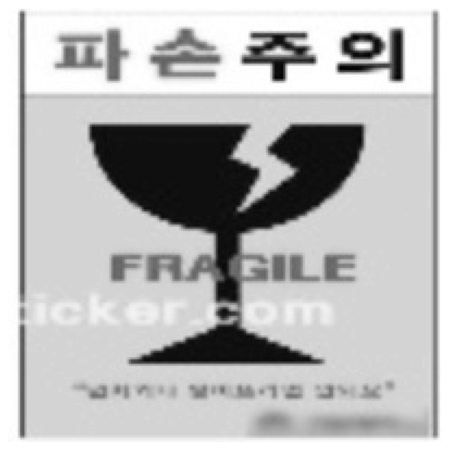

fragile


In [9]:
for_test = features[4]
for_test_img = for_test.reshape(200,200)
show(for_test_img)
print(categories[labels[0]])

### train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [11]:
#이진분류기 훈련
y_train_fragile = (y_train ==0)
y_test_fragile = (y_test ==0)

### train

In [12]:
import sklearn

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [18]:
sgd_clf = sklearn.linear_model.SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_fragile)

SGDClassifier(random_state=42)

### Evaluation model

In [19]:
#confusion matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_fragile, cv=3)

confusion_matrix(y_train_fragile, y_train_pred)

array([[221,  97],
       [ 99, 133]], dtype=int64)

In [22]:
#precision , recall, f1-score

print("Precision Score: ", precision_score(y_train_fragile, y_train_pred))
print("Recall Score: ", recall_score(y_train_fragile, y_train_pred))
print("F1-Score: ", f1_score(y_train_fragile, y_train_pred))

Precision Score:  0.5782608695652174
Recall Score:  0.5732758620689655
F1-Score:  0.5757575757575757


### Trade Off

In [48]:
y_scores_test = sgd_clf.decision_function([for_test])
y_scores_test

array([2.17442559e+08])

In [53]:
#분류기 각 샘플의 점수 --> 임계치 확인하는데 사용
# y_scores = sgd_clf.decision_function(X_train)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_fragile, cv=5, method = 'decision_function')
len(y_scores)

550

In [50]:
#임계값 설정 안해도 fragile이라 잘 예측한 경우

threshold = 0
y_some_img_prd = (y_scores_test > threshold)
y_some_img_prd

array([ True])

In [59]:
#임계값 설정 안해도 fragile이라 잘 예측한 경우

threshold =0.3
y_some_img_prd = (y_scores_test > threshold)
y_some_img_prd

array([ True])

In [52]:
# 정밀도와 재현율그리기
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_fragile, cv=5, method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_fragile, y_scores)

In [57]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label ='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.legend()
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
#     plt.axis([-50000, 50000, 0, 1]) 

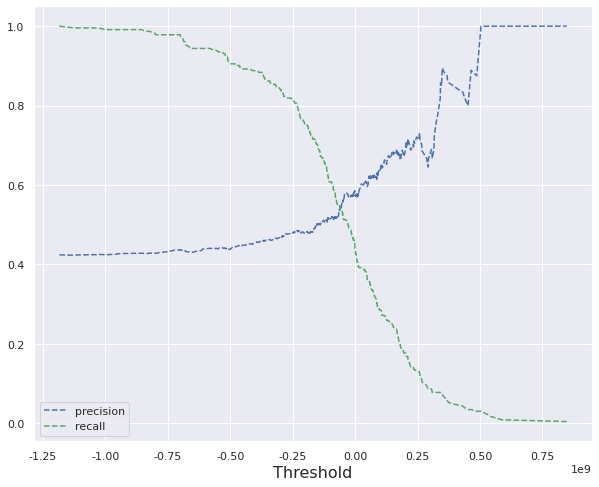

In [58]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

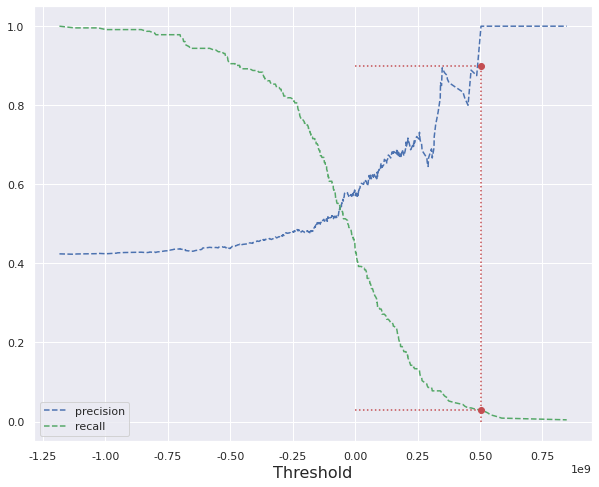

In [102]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


# recall 90 달성목표                                                                # Not shown
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# preciosn 90을 달성목표
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
# save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

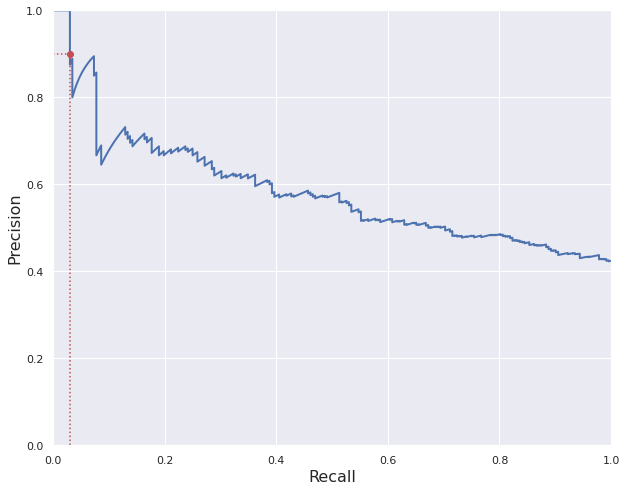

In [103]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16) #재현율
    plt.ylabel("Precision", fontsize=16) #정밀도
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

### 훈련된 분류기 평가

In [109]:
# recall 90 달성목표                                                             
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# preciosn 90을 달성목표
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [110]:
y_train_90 = (y_scores >=threshold_90_precision)

In [111]:
print("Precision Score: ", precision_score(y_train_fragile, y_train_90))
print("Recall Score: ", recall_score(y_train_fragile, y_train_90))

#정밀도 100! 달성, but recall이 너무 낮으면 똥

Precision Score:  1.0
Recall Score:  0.03017241379310345


### ROC곡선

In [113]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_fragile, y_scores)

In [114]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)   

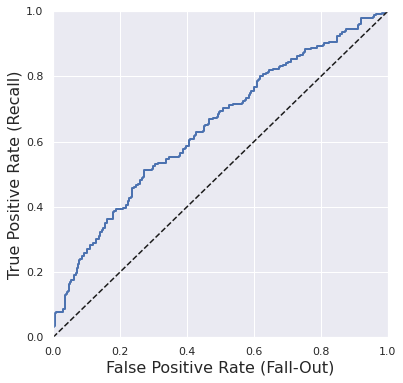

In [116]:
plt.figure(figsize=(6, 6))
plot_roc_curve(fpr, tpr)

In [118]:
# 1에 가까워질 수록 좋은 분류기

roc_auc_score(y_train_fragile, y_scores)

0.6440170245066146

#### RF 모델하고 비교해보기

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_fragile, cv=5, method = 'predict_proba')

In [122]:
#양성 클래스에 대한 확률을 점수로 사용함
y_scores_forest = y_probas_forest[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_fragile, y_scores_forest)

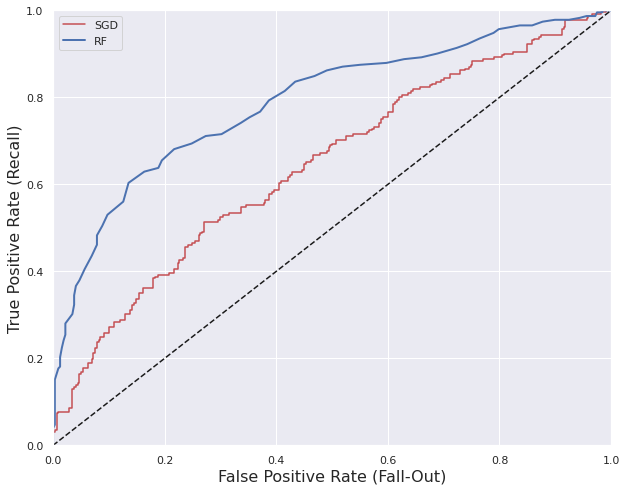

In [125]:
plt.plot(fpr, tpr, 'r', label = 'SGD')
plot_roc_curve(fpr_rf, tpr_rf, "RF")
plt.legend()
plt.show()

In [126]:
roc_auc_score(y_train_fragile, y_scores_forest)

0.7901214487096074

In [146]:
#모델저장

import joblib

joblib.dump(sgd_clf,'SGD_binary_fragile_644.pkl')

['SGD_binary_fragile_644.pkl']

In [147]:
loaded_model = joblib.load('SGD_binary_fragile_644.pkl')

### test

In [149]:
pred = loaded_model.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_fragile, pred)
score

0.6739130434782609